# Ray Aiming

This tutorial demonstrates new Ray Aiming strategies in Optiland. 
By default, Optiland uses **Paraxial** ray aiming, which estimates ray launch coordinates based on the paraxial entrance pupil. 
For systems with significant pupil aberration (wide angle, fisheye, etc.), rays may fail to pass through the stop if aimed paraxially.

We introduce **Iterative** and **Robust** (Pupil Expansion) aiming to solve this.

In [1]:
import optiland.backend as be
from optiland.optic import Optic

## 1. Create a Wide-angle System

In [2]:
class WideAngleLens(Optic):

    def __init__(self):
        super().__init__()

        self.add_surface(index=0, radius=be.inf, thickness=be.inf)
        self.add_surface(index=1, radius=38.9150, thickness=0.5459, material='N-BK7')
        self.add_surface(index=2, radius=3.6152, thickness=1.6595)
        self.add_surface(index=3, radius=be.inf, thickness=0.6927, material='N-BK7')
        self.add_surface(index=4, radius=5.2515, thickness=1.4576)
        self.add_surface(index=5, radius=-5.2515, thickness=0.6927, material='N-BK7')
        self.add_surface(index=6, radius=be.inf, thickness=4.1494)
        self.add_surface(index=7, radius=5.1075, thickness=0.7, material='SF4')
        self.add_surface(index=8, radius=-10.8385, thickness=0.0162)
        self.add_surface(index=9, radius=2.3897, thickness=0.7443, material='SF4')
        self.add_surface(index=10, radius=2.2789, thickness=0.1136)
        self.add_surface(index=11, radius=be.inf, thickness=0.1040, is_stop=True)
        self.add_surface(index=12, radius=-2.3536, thickness=0.7038, material='SF1')
        self.add_surface(index=13, radius=2.7829, thickness=0.5423, material='N-LAK7')
        self.add_surface(index=14, radius=-2.8287, thickness=0.2506)
        self.add_surface(index=15, radius=13.1578, thickness=0.6350, material='N-LAK7')
        self.add_surface(index=16, radius=-1.4944, thickness=0.2922, material='SF4')
        self.add_surface(index=17, radius=-4.8082, thickness=0.0668)
        self.add_surface(index=18, radius=4.3447, thickness=0.5059, material='N-LAK21')
        self.add_surface(index=19, radius=72.8673, thickness=2.2376)
        self.add_surface(index=20)

        self.set_aperture(aperture_type='EPD', value=0.5)

        self.set_field_type(field_type='angle')
        self.add_field(y=0)
        self.add_field(y=40)
        self.add_field(y=56)
        self.add_field(y=80)

        self.add_wavelength(value=0.55, is_primary=True)

In [3]:
optic = WideAngleLens()

## 2. Robust Ray Aiming
We can easily switch to a robust aiming strategy using `set_ray_aiming`.

Note that we set the ray aiming method to `'robust'` to handle the wide-angle system. Alternatively, we could use the `'iterative'` method, which is more robust than the `'paraxial'` method, but which may fail for high field of view systems.

In [4]:
# Enable Robust Ray Aiming
optic.set_ray_aiming(mode="robust", max_iter=10, tol=1e-6, cache=True)  # enable caching too for performance

print(f"Current Aiming Config: {optic.ray_aiming_config}")

Current Aiming Config: {'mode': 'robust', 'max_iter': 10, 'tol': 1e-06, 'cache': True}


## 3. Verify
Now we visualize the system to confirm all fields are traced properly. The optical system will automatically use the robust strategy.

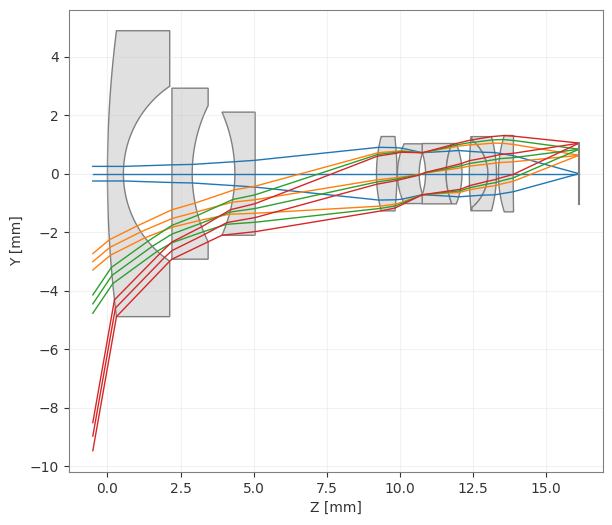

In [5]:
_ = optic.draw(figsize=(10, 6))